In [18]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from timeStampsConversions import ordinal_to_timestamp

In [19]:
df = pd.read_csv('src/saveString.csv', usecols=lambda column: column != 'row_Index')
df.head()

,date_time,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation
0,44195.5,22.853895,22.516237,4.004054,13.232249,63.076292,27.363563,1.000000,1.0
1,44196.0,23.022185,22.032005,4.018279,13.244610,62.745971,27.594435,1.000000,1.0
2,44196.5,22.825662,22.346057,4.061755,13.162393,62.834833,28.040597,1.000000,1.0
3,44197.0,22.735109,21.638168,4.086060,13.273847,62.126225,28.236914,1.000000,1.0
4,44197.5,22.954057,22.309238,4.123576,13.103417,62.951683,28.020843,0.981944,1.0


In [20]:
df['date_time'] = df['date_time'].apply(ordinal_to_timestamp)
df.head()

,date_time,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation
0,2020-12-31 12:00:00,22.853895,22.516237,4.004054,13.232249,63.076292,27.363563,1.000000,1.0
1,2021-01-01 00:00:00,23.022185,22.032005,4.018279,13.244610,62.745971,27.594435,1.000000,1.0
2,2021-01-01 12:00:00,22.825662,22.346057,4.061755,13.162393,62.834833,28.040597,1.000000,1.0
3,2021-01-02 00:00:00,22.735109,21.638168,4.086060,13.273847,62.126225,28.236914,1.000000,1.0
4,2021-01-02 12:00:00,22.954057,22.309238,4.123576,13.103417,62.951683,28.020843,0.981944,1.0


In [21]:
df['date_time']=pd.DatetimeIndex(df['date_time'])

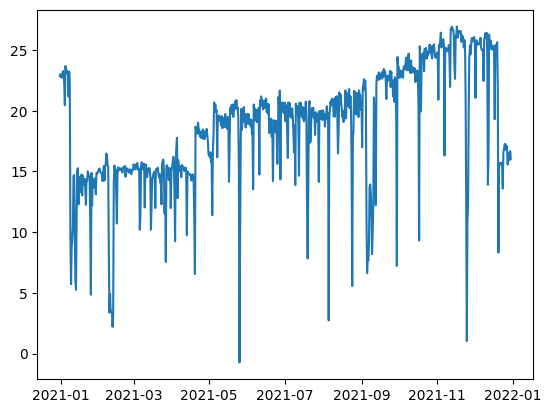

In [22]:
plt.plot(df['date_time'], df['dp_PGCT'])

In [23]:
def plot_boxplots(df):
    columns = df.columns.difference(['date_time'])
    for column in columns:
        plt.figure(figsize=(10, 2))
        df.boxplot(column=column, vert=False)
        plt.title(f'Boxplot of {column}')
        plt.show()

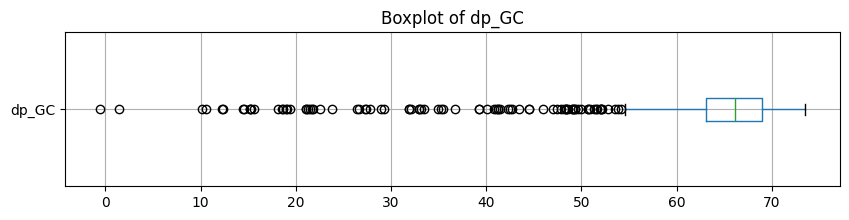

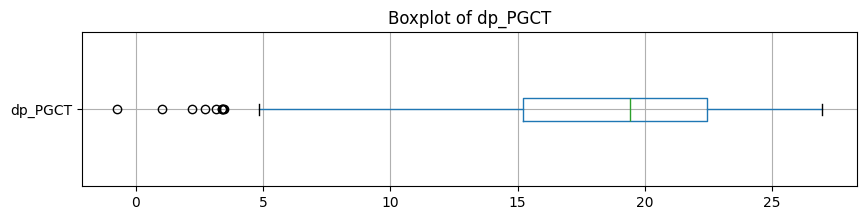

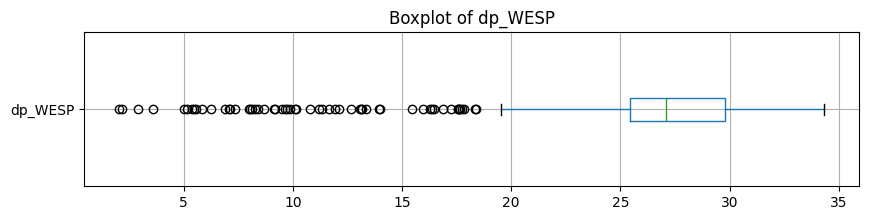

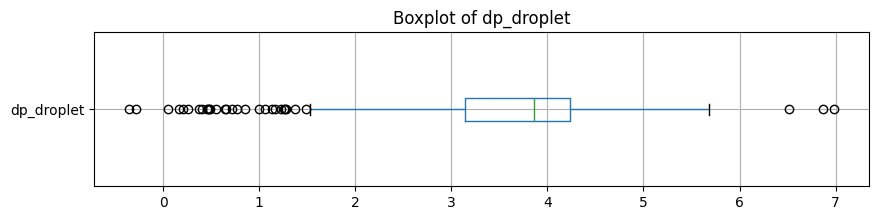

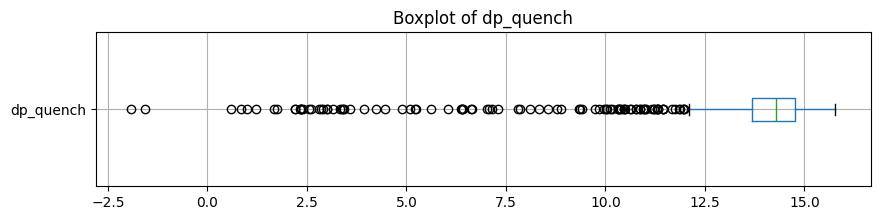

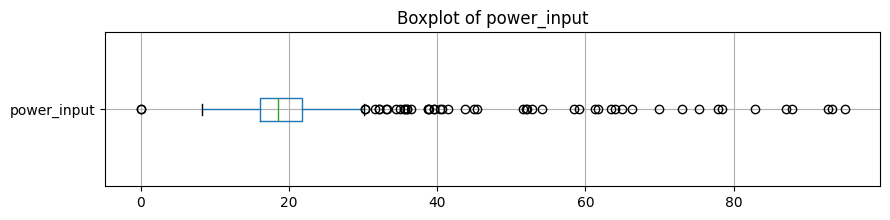

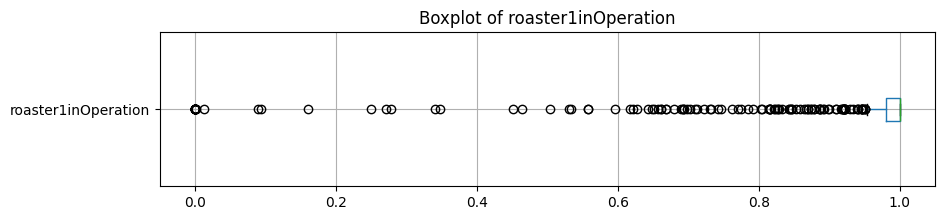

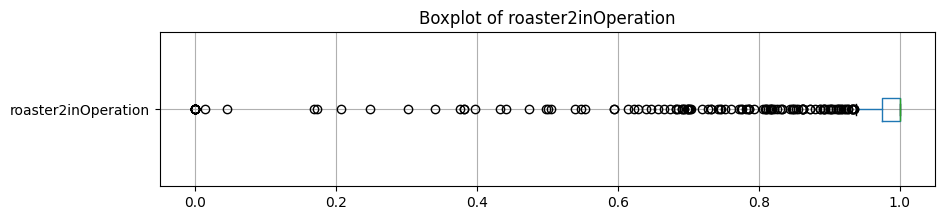

In [24]:
plot_boxplots(df)

The factor of 1.5 is used in the context of boxplots to identify outliers because it provides a balance between sensitivity and robustness. Here's why:

Statistical Basis: IQR measures the spread of the middle 50% of the data. By using 1.5 times the IQR, we extend this range to capture a reasonable spread of the data while still being sensitive to extreme values.

Empirical Rule: For a normal distribution, approximately 99.3% of the data lies within 3 standard deviations from the mean. Using 1.5 times the IQR (which is roughly equivalent to 2.7 standard deviations for a normal distribution) captures most of the data while flagging extreme values as outliers.

Robustness: The 1.5 factor is robust to different data distributions. It works well for a variety of datasets, not just those that are normally distributed.

In [25]:

def remove_outliers(df, factor):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1    
    df_out = df[~((df < (Q1 - factor * IQR)) | (df > (Q3 + factor * IQR))).any(axis=1)]
    return df_out


df_cleaned = remove_outliers(df.drop(columns=['date_time']), factor=1.5)

df_cleaned['date_time'] = df['date_time']
df_cleaned['date_time']=pd.DatetimeIndex(df_cleaned['date_time'])

df_cleaned.describe()

,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation,date_time
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530
mean,19.809675,28.369375,3.903471,14.491265,66.940390,18.268126,0.995147,0.994334,2021-07-02 06:24:27.169811456
min,13.525761,20.953913,2.375972,12.831413,54.842084,8.238697,0.954167,0.937500,2020-12-31 12:00:00
25%,15.681770,26.334185,3.414899,14.105330,64.777507,15.844133,0.994444,0.993403,2021-04-07 03:00:00
50%,19.854632,27.841578,4.005604,14.496327,66.921019,18.046975,1.000000,1.000000,2021-06-25 06:00:00
75%,22.892155,30.580183,4.303452,14.897642,69.445930,20.481914,1.000000,1.000000,2021-10-03 18:00:00
max,26.946954,34.314011,5.549113,15.781345,73.448466,29.582882,1.000000,1.000000,2021-12-30 12:00:00
std,3.745672,2.790155,0.618117,0.545841,3.144132,3.830585,0.009573,0.011131,NaN


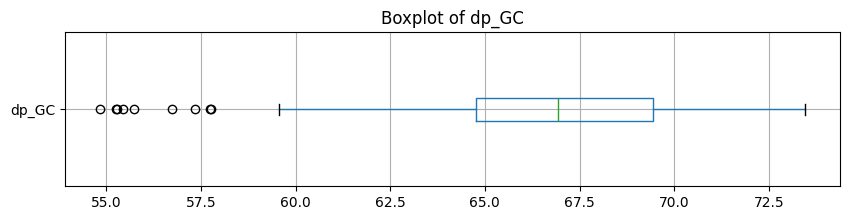

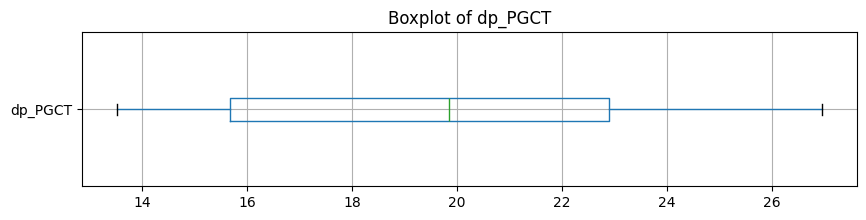

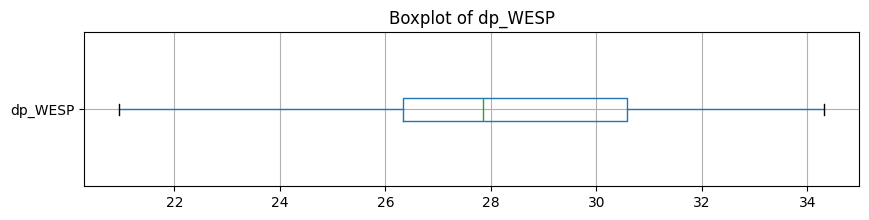

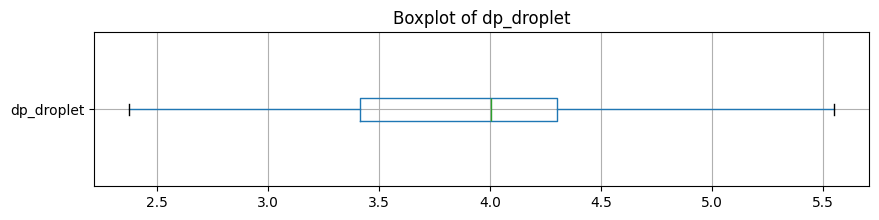

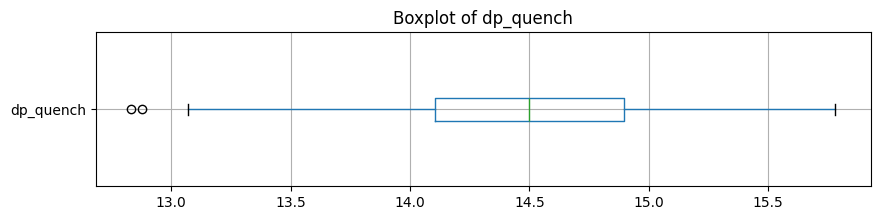

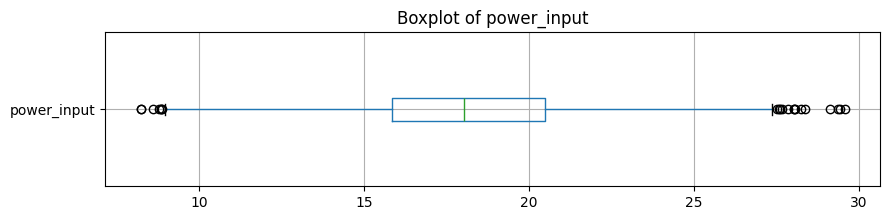

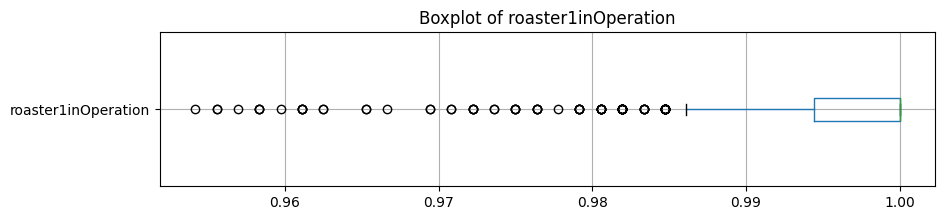

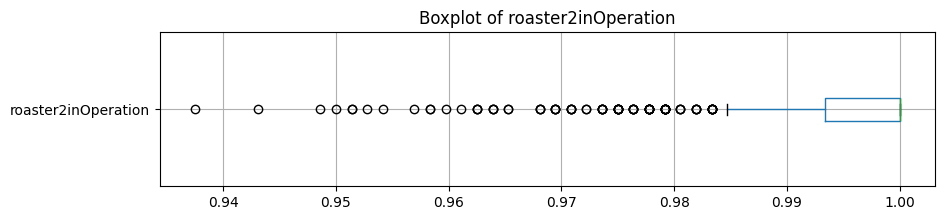

In [26]:
plot_boxplots(df_cleaned)

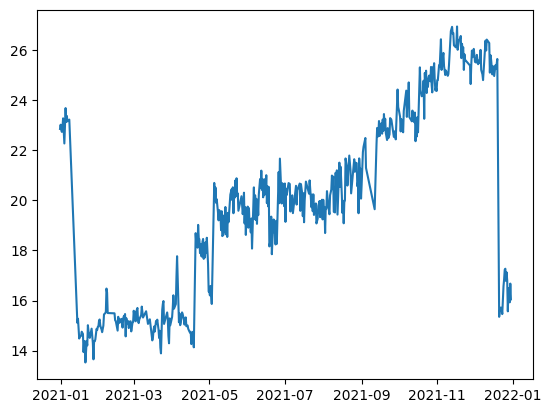

In [27]:
plt.plot(df_cleaned['date_time'], df_cleaned['dp_PGCT'], label='dp_PGCT')

Modified Z-Score Method:

Use the median and median absolute deviation (MAD) instead of mean and standard deviation.
Data points with a modified Z-score greater than a threshold (e.g., 3.5) are considered outliers.

In [28]:
# import numpy as np
# def remove_modified_z_score_outliers(df, threshold=2.5):
#     df_cleaned = df.copy()
#     for column in df_cleaned.columns.difference(['date_time']):
#         median = np.median(df_cleaned[column])
#         mad = np.median(np.abs(df_cleaned[column] - median))
#         modified_z_scores = 0.6745 * (df_cleaned[column] - median) / mad
#         outliers = np.where(np.abs(modified_z_scores) > threshold)
#         df_cleaned = df_cleaned.drop(df_cleaned.index[outliers])
#     return df_cleaned

# df_cleaned = remove_modified_z_score_outliers(df)

In [29]:
df_cleaned.describe()

,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation,date_time
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530
mean,19.809675,28.369375,3.903471,14.491265,66.940390,18.268126,0.995147,0.994334,2021-07-02 06:24:27.169811456
min,13.525761,20.953913,2.375972,12.831413,54.842084,8.238697,0.954167,0.937500,2020-12-31 12:00:00
25%,15.681770,26.334185,3.414899,14.105330,64.777507,15.844133,0.994444,0.993403,2021-04-07 03:00:00
50%,19.854632,27.841578,4.005604,14.496327,66.921019,18.046975,1.000000,1.000000,2021-06-25 06:00:00
75%,22.892155,30.580183,4.303452,14.897642,69.445930,20.481914,1.000000,1.000000,2021-10-03 18:00:00
max,26.946954,34.314011,5.549113,15.781345,73.448466,29.582882,1.000000,1.000000,2021-12-30 12:00:00
std,3.745672,2.790155,0.618117,0.545841,3.144132,3.830585,0.009573,0.011131,NaN


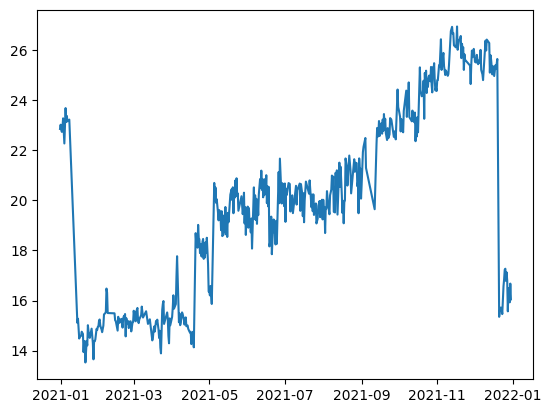

In [30]:
plt.plot(df_cleaned['date_time'], df_cleaned['dp_PGCT'], label='dp_PGCT')

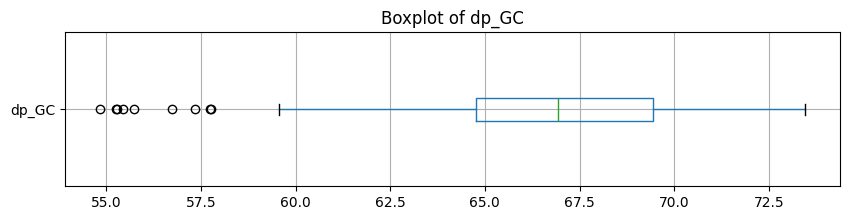

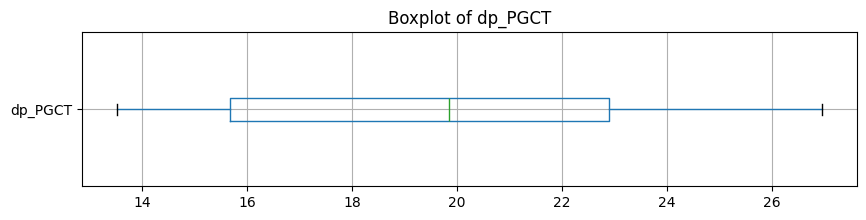

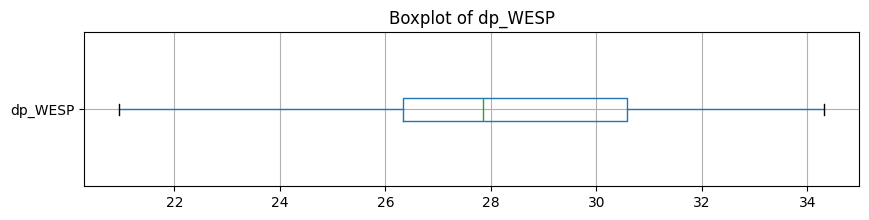

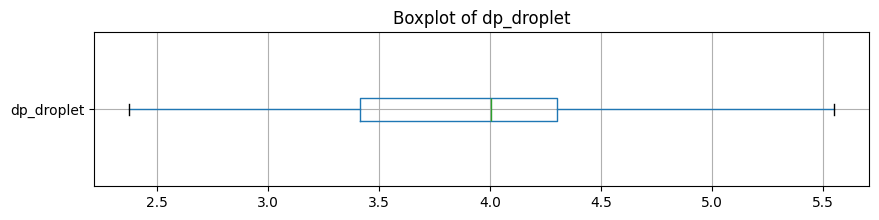

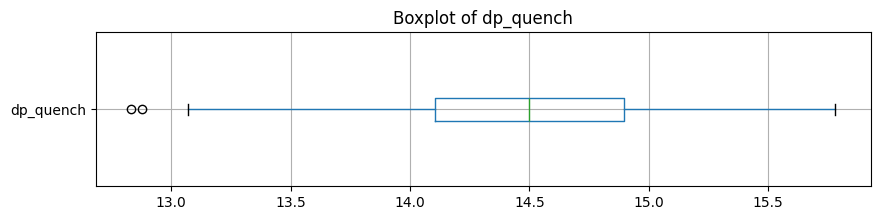

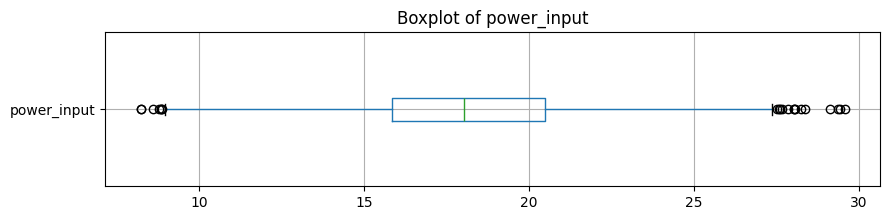

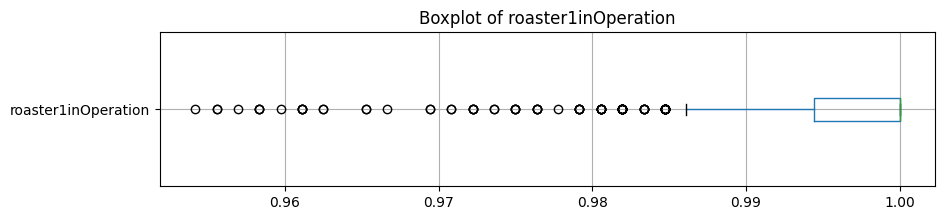

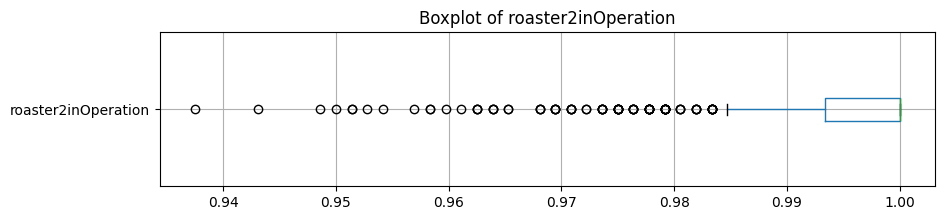

In [31]:
plot_boxplots(df_cleaned)

In [32]:
df_cleaned.describe()

,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation,date_time
count,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530.000000,530
mean,19.809675,28.369375,3.903471,14.491265,66.940390,18.268126,0.995147,0.994334,2021-07-02 06:24:27.169811456
min,13.525761,20.953913,2.375972,12.831413,54.842084,8.238697,0.954167,0.937500,2020-12-31 12:00:00
25%,15.681770,26.334185,3.414899,14.105330,64.777507,15.844133,0.994444,0.993403,2021-04-07 03:00:00
50%,19.854632,27.841578,4.005604,14.496327,66.921019,18.046975,1.000000,1.000000,2021-06-25 06:00:00
75%,22.892155,30.580183,4.303452,14.897642,69.445930,20.481914,1.000000,1.000000,2021-10-03 18:00:00
max,26.946954,34.314011,5.549113,15.781345,73.448466,29.582882,1.000000,1.000000,2021-12-30 12:00:00
std,3.745672,2.790155,0.618117,0.545841,3.144132,3.830585,0.009573,0.011131,NaN


In [33]:
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.head()

,dp_PGCT,dp_WESP,dp_droplet,dp_quench,dp_GC,power_input,roaster1inOperation,roaster2inOperation,date_time
0,22.853895,22.516237,4.004054,13.232249,63.076292,27.363563,1.000000,1.0,2020-12-31 12:00:00
1,23.022185,22.032005,4.018279,13.244610,62.745971,27.594435,1.000000,1.0,2021-01-01 00:00:00
2,22.825662,22.346057,4.061755,13.162393,62.834833,28.040597,1.000000,1.0,2021-01-01 12:00:00
3,22.735109,21.638168,4.086060,13.273847,62.126225,28.236914,1.000000,1.0,2021-01-02 00:00:00
4,22.954057,22.309238,4.123576,13.103417,62.951683,28.020843,0.981944,1.0,2021-01-02 12:00:00


In [35]:
df_cleaned.to_csv('src/cleanedData.csv', index=False)